# S&P500 MARKET RISK ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from arch import arch_model
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import norm
from datetime import datetime

# EDA

In [2]:
SP500 = pd.read_excel("SP500_97Jan-09June.xlsx", sheet_name="Data")
SP500

,Date,Adj Close
0,1997-01-02,737.01
1,1997-01-03,748.03
2,1997-01-06,747.65
3,1997-01-07,753.23
4,1997-01-08,748.41
...,...,...
3139,2009-06-24,900.94
3140,2009-06-25,920.26
3141,2009-06-26,918.90
3142,2009-06-29,927.23


In [3]:
SP500 = SP500.set_index('Date')

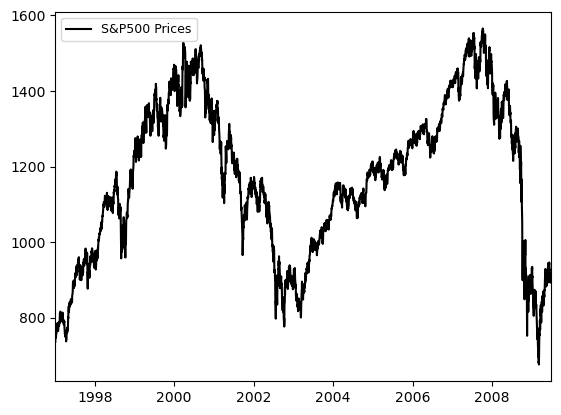

In [4]:
plt.plot(SP500['Adj Close'], label="S&P500 Prices",c='k',lw=1.5)
plt.xlim(datetime.strptime("1997-01-01", '%Y-%m-%d'),datetime.strptime("2009-06-30", '%Y-%m-%d'))
plt.legend(loc='best', fontsize=9)

In [5]:
SP500['Returns'] = SP500['Adj Close'].pct_change()
SP500

,Adj Close,Returns
Date,,
1997-01-02,737.01,NaN
1997-01-03,748.03,0.014952
1997-01-06,747.65,-0.000508
1997-01-07,753.23,0.007463
1997-01-08,748.41,-0.006399
...,...,...
2009-06-24,900.94,0.006524
2009-06-25,920.26,0.021444
2009-06-26,918.90,-0.001478


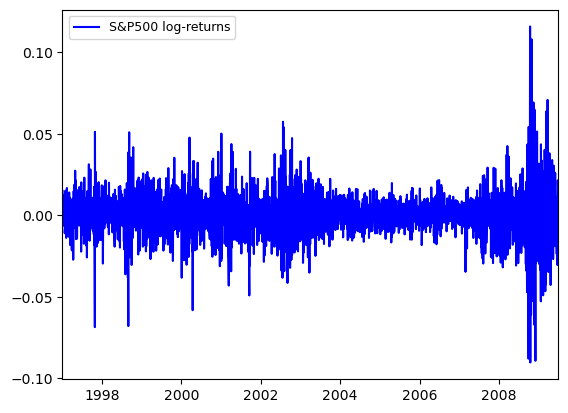

In [6]:
plt.plot(SP500['Returns'], label="S&P500 log-returns",c='b',lw=1.5)
plt.xlim(datetime.strptime("1997-01-01", '%Y-%m-%d'),datetime.strptime("2009-06-30", '%Y-%m-%d'))
plt.legend(loc='best', fontsize=9)

In [7]:
SP500.head()

,Adj Close,Returns
Date,,
1997-01-02,737.01,NaN
1997-01-03,748.03,0.014952
1997-01-06,747.65,-0.000508
1997-01-07,753.23,0.007463
1997-01-08,748.41,-0.006399


In [8]:
DF_test = sm.tsa.stattools.adfuller(SP500['Adj Close'], regression='ct', autolag='BIC', store=False, regresults=True)
DF_test

(-1.8773000705181586,
 0.6663489564382783,
 {'1%': -3.961655120731835,
  '5%': -3.4118886887583293,
  '10%': -3.127873575889991},
 <statsmodels.stats.diagnostic.ResultsStore at 0x15a0ccf80>)

In [9]:
sm.tsa.stattools.adfuller(SP500['Returns'].dropna(), regression='c', autolag='BIC', store=False, regresults=True)

(-44.57735332895806,
 0.0,
 {'1%': -3.4324336205696255,
  '5%': -2.862460615102446,
  '10%': -2.567260065043355},
 <statsmodels.stats.diagnostic.ResultsStore at 0x159e95250>)

In [10]:
# Multiplying returns by 100 will help the optimizer
returns = 100 * SP500['Returns'].dropna()

start_date_in = '1997-01-01'
end_date_in ='2007-06-30'

returns_in = returns.loc[start_date_in:end_date_in]

returns_out = returns.loc[end_date_in:]

In [11]:
#===========================================================================
# Jarque-Bera tests from statsmodels
#===========================================================================

jb_in = sm.stats.stattools.jarque_bera(returns_in, axis=0)
print(jb_in[0])
print(jb_in[1])
print(jb_in[2]) #Skewness
print(jb_in[3]) #Kurtosis

1047.8422138819437
2.910410864219878e-228
-0.0017674053575682364
6.086978369296567


In [12]:
#===========================================================================
# ARCH tests
#===========================================================================
returns_in_sq = returns_in**2

n_autocor = 5
sm.stats.diagnostic.acorr_ljungbox(returns_in_sq, lags=[n_autocor])

,lb_stat,lb_pvalue
5,419.212579,2.141507e-88


# STATS MODELS 

Iteration:      1,   Func. Count:      7,   Neg. LLF: 16897.832903353603
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4114.616213612471
Iteration:      3,   Func. Count:     24,   Neg. LLF: 314932.6391253836
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3735.376931685475
Iteration:      5,   Func. Count:     39,   Neg. LLF: 4873.527524886316
Iteration:      6,   Func. Count:     46,   Neg. LLF: 3729.4939388374337
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3808.892813878044
Iteration:      8,   Func. Count:     60,   Neg. LLF: 3729.346159310656
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6587.335088298293
Iteration:     10,   Func. Count:     75,   Neg. LLF: 3728.115799992055
Iteration:     11,   Func. Count:     81,   Neg. LLF: 3728.1105222935394
Iteration:     12,   Func. Count:     87,   Neg. LLF: 3728.107746863646
Iteration:     13,   Func. Count:     93,   Neg. LLF: 3728.1076450718774
Iteration:     14,   Func. Count:     99,   Neg. LLF: 3728.1

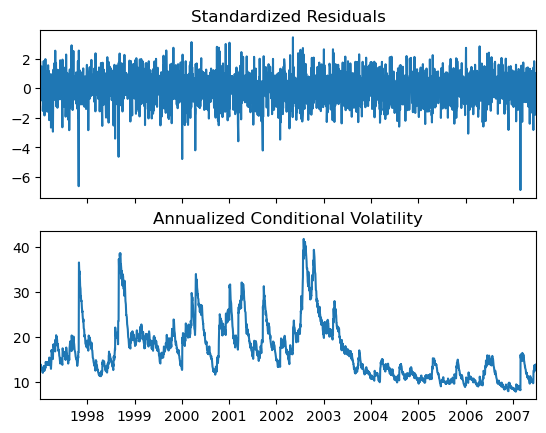

In [13]:
#===========================================================================
# GARCH(1,1)-t estimates vs. GJR-GARCH(1,1)
#===========================================================================

garch_res = arch_model(returns_in, p=1, o=0, q=1, dist='t').fit()
print(garch_res.summary())
fig = garch_res.plot(annualize='D')

Iteration:      1,   Func. Count:      8,   Neg. LLF: 15682.000308812741
Iteration:      2,   Func. Count:     20,   Neg. LLF: 15944.631000913567
Iteration:      3,   Func. Count:     31,   Neg. LLF: 96715.40569671427
Iteration:      4,   Func. Count:     39,   Neg. LLF: 3697.99862355972
Iteration:      5,   Func. Count:     47,   Neg. LLF: 3699.015861314278
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4381.165271505912
Iteration:      7,   Func. Count:     63,   Neg. LLF: 3688.5590739651434
Iteration:      8,   Func. Count:     71,   Neg. LLF: 3725.2090325075146
Iteration:      9,   Func. Count:     79,   Neg. LLF: 3698.7009820794024
Iteration:     10,   Func. Count:     88,   Neg. LLF: 3686.788531876442
Iteration:     11,   Func. Count:     95,   Neg. LLF: 3686.776138352369
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3686.7756957814954
Iteration:     13,   Func. Count:    109,   Neg. LLF: 3686.7756710039007
Iteration:     14,   Func. Count:    116,   Neg. LLF: 3686

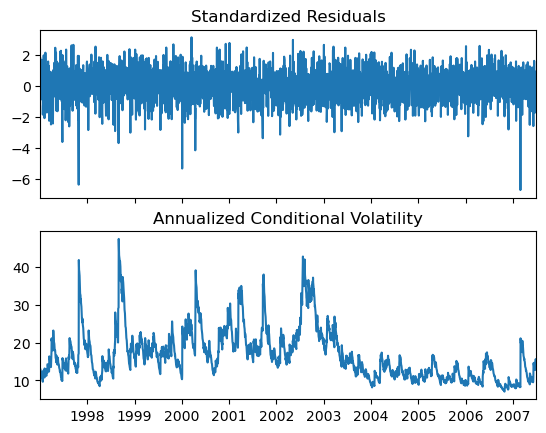

In [14]:
gjr_res = arch_model(returns_in, p=1, o=1, q=1, dist='t').fit()
print(gjr_res.summary())
fig = gjr_res.plot(annualize='D')

In [15]:
LR_stat = -2*(garch_res.loglikelihood - gjr_res.loglikelihood)
if LR_stat > chi2.ppf(0.99,1):
    print('Rejet H0')
else:
    print('Non Rejet H0')
    
# Reject H0, we prefer non-constraint model

Rejet H0


Iteration:      1,   Func. Count:     10,   Neg. LLF: 16646.425741500032
Iteration:      2,   Func. Count:     24,   Neg. LLF: 15649.451084811444
Iteration:      3,   Func. Count:     37,   Neg. LLF: 13036.58927911026
Iteration:      4,   Func. Count:     50,   Neg. LLF: 98759.68255387477
Iteration:      5,   Func. Count:     61,   Neg. LLF: 73691.64642165464
Iteration:      6,   Func. Count:     71,   Neg. LLF: 3691.929958604289
Iteration:      7,   Func. Count:     81,   Neg. LLF: 4364.206200369901
Iteration:      8,   Func. Count:     92,   Neg. LLF: 33303.1259326232
Iteration:      9,   Func. Count:    102,   Neg. LLF: 3693.205510110674
Iteration:     10,   Func. Count:    112,   Neg. LLF: 3683.9043556574825
Iteration:     11,   Func. Count:    122,   Neg. LLF: 3699.025867126794
Iteration:     12,   Func. Count:    132,   Neg. LLF: 3681.59468567935
Iteration:     13,   Func. Count:    141,   Neg. LLF: 3681.550335823097
Iteration:     14,   Func. Count:    150,   Neg. LLF: 3681.5465

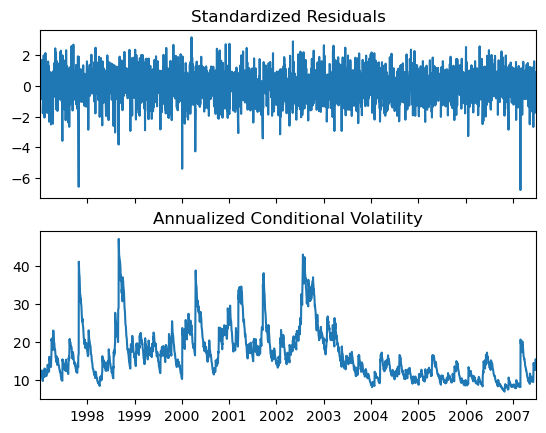

In [16]:
ar_gjr_res = arch_model(returns_in, mean='AR', lags=2, p=1, o=1, q=1, dist='t').fit()
print(ar_gjr_res.summary())
fig = ar_gjr_res.plot(annualize='D')

In [17]:
LR_stat = -2*(gjr_res.loglikelihood - ar_gjr_res.loglikelihood)
if LR_stat > chi2.ppf(0.90,2):
    print('Rejet H0')
else:
    print('Non Rejet H0')

# Reject H0 means the unconstraint model (AR-GJR) is more relevant. However, coef of AR component of AR-GJR model is not statistically significant so we decide to take just GJR model for simplicity 

Rejet H0


In [18]:
#===========================================================================
# Ljung-Box test on gjr residuals (validation step)
#===========================================================================

n_autocor = 5
sm.stats.diagnostic.acorr_ljungbox(gjr_res.resid/gjr_res.conditional_volatility, lags=[n_autocor])

# Not reject H0, there is no correlation in standardized residuals

,lb_stat,lb_pvalue
5,7.798763,0.16768


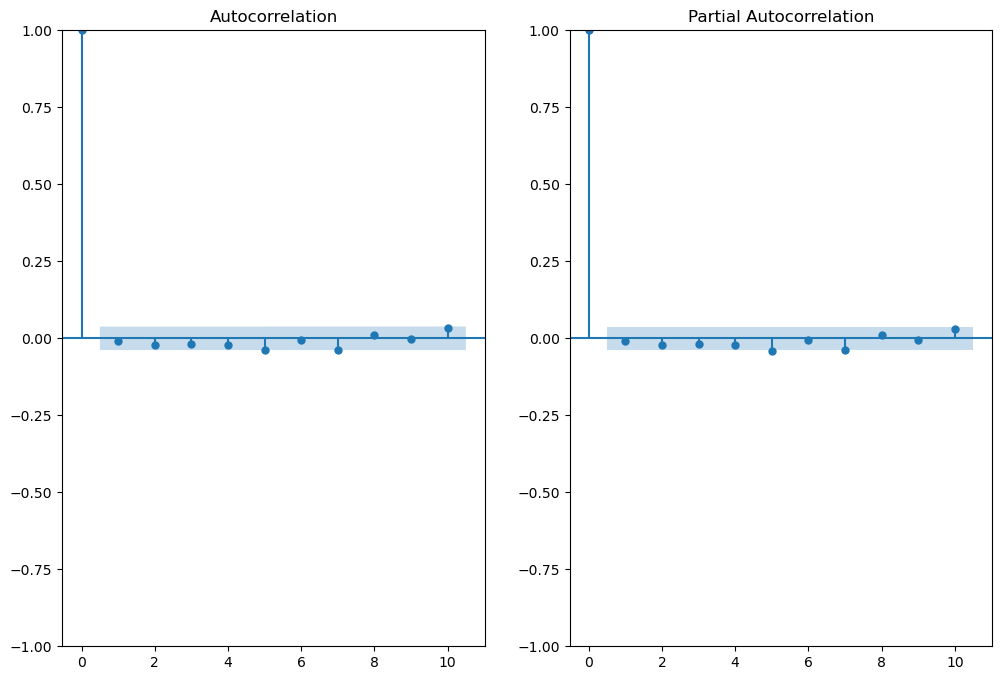

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(gjr_res.resid/gjr_res.conditional_volatility, lags=10, ax=ax1, alpha=0.05)
ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_pacf(gjr_res.resid/gjr_res.conditional_volatility, lags=10, ax=ax2, alpha=0.05)

# FORCASTING

Iteration:      1,   Func. Count:      8,   Neg. LLF: 15682.000308812741
Iteration:      2,   Func. Count:     20,   Neg. LLF: 15944.631000913567
Iteration:      3,   Func. Count:     31,   Neg. LLF: 96715.40569671427
Iteration:      4,   Func. Count:     39,   Neg. LLF: 3697.99862355972
Iteration:      5,   Func. Count:     47,   Neg. LLF: 3699.015861314278
Iteration:      6,   Func. Count:     55,   Neg. LLF: 4381.165271505912
Iteration:      7,   Func. Count:     63,   Neg. LLF: 3688.5590739651434
Iteration:      8,   Func. Count:     71,   Neg. LLF: 3725.2090325075146
Iteration:      9,   Func. Count:     79,   Neg. LLF: 3698.7009820794024
Iteration:     10,   Func. Count:     88,   Neg. LLF: 3686.788531876442
Iteration:     11,   Func. Count:     95,   Neg. LLF: 3686.776138352369
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3686.7756957814954
Iteration:     13,   Func. Count:    109,   Neg. LLF: 3686.7756710039007
Iteration:     14,   Func. Count:    116,   Neg. LLF: 3686

<Axes: xlabel='Date'>

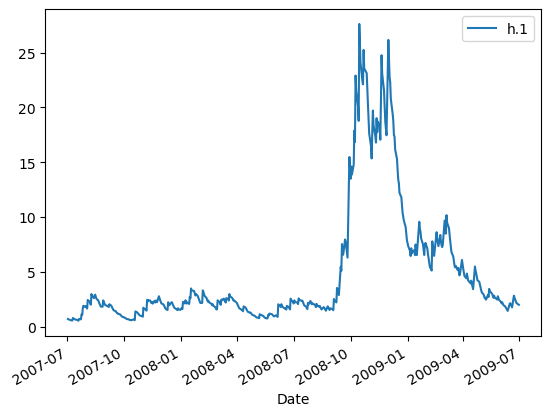

In [20]:
#===========================================================================
# Forecast
#===========================================================================

import datetime as dt
start = dt.datetime(1997,1,1)
end = dt.datetime(2009,6,30)
am = arch_model(returns, p=1, o=1, q=1, dist='t')

split_date = dt.datetime(2007,7,2)
res = am.fit(last_obs=split_date)

forecasts = res.forecast(horizon=1, start=split_date, reindex=True)
forecasts.variance[split_date:].plot()

In [21]:
res.params[0]

/var/folders/4m/44lhvkwx4nvgyd60ttsx1vk00000gn/T/ipykernel_7616/1386208526.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res.params[0]


0.03145657400215521

0.025793650793650792


/var/folders/4m/44lhvkwx4nvgyd60ttsx1vk00000gn/T/ipykernel_7616/3090428214.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  VaR_forecast = res.params[0] + np.sqrt(forecasts.variance[split_date:]) * t.ppf(alpha,res.params[-1])


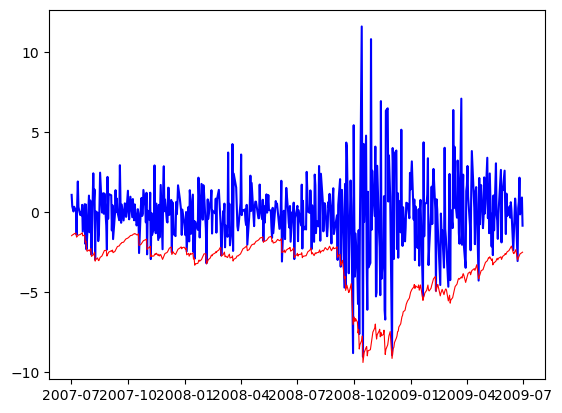

In [22]:
alpha = 0.05
VaR_forecast = res.params[0] + np.sqrt(forecasts.variance[split_date:]) * t.ppf(alpha,res.params[-1])

plt.plot(returns_out, 'b', label='Log-Returns', markersize=0.6)
plt.plot(VaR_forecast, 'r', label='VaR std',linewidth=0.8)

print(np.mean(returns_out < VaR_forecast['h.1'])) 

# BACKTESTING

In [23]:
# Construct the series of exceptions, denoted I (an exception occurs when the return is below the VaR)
I = (returns_out < VaR_forecast['h.1'])

# Count the number of exceptions (also called violations, breaches, or hits), noted as n_1
n_1 = sum(I == 1)
print(n_1)

# Count the number of non-exceptions (= 0) in the series I, noted as n_0
n_0 = sum(I == 0)

# Count the total number of observations in I, noted as deno (verify that n_0 + n_1 = T)
deno = n_0 + n_1

13


In [24]:
""" Unconditional Coverage Test (Kupiec Test) """
p = 0.05  # Theoretical probability level (e.g., 5% VaR)

# Likelihood under the null hypothesis (H0) for unconditional coverage
# Denoted as L_uc_H0, given by equation (1) where p = alpha
L_uc_H0 = (1 - p) ** n_0 * (p) ** n_1

# Likelihood under the alternative hypothesis (H1)
# Let pi_hat_uc be the maximum likelihood estimator of the empirical exception rate
pi_hat_uc = n_1 / float(len(returns_out))

# Likelihood under H1, denoted as L_uc_H1, given by equation (2)
L_uc_H1 = (1 - pi_hat_uc) ** n_0 * (pi_hat_uc) ** n_1

# Likelihood Ratio (LR) statistic for the unconditional coverage test
# Denoted as LR_uc, given by equation (3)
LR_uc = -2 * np.log(L_uc_H0 / L_uc_H1)
print("LR_uc statistic:", LR_uc)

# Compute the associated p-value under chi-squared distribution with 1 degree of freedom
Pvalue_uc = 1 - chi2.cdf(LR_uc, 1)
print("P-value (Unconditional Coverage):", Pvalue_uc)

LR_uc statistic: 7.498992773258012
P-value (Unconditional Coverage): 0.006173350967120572


In [25]:
""" Independence Test (Christoffersen Test) """

# From I_lead, take observations from index 1 to T
I_lead = I[1:]
# From I_lag, take observations from index 0 to T-1
I_lag = I[0:len(I) - 1]

# Initialize the transition counters
n_11 = 0  # Transition: exception → exception
n_10 = 0  # Transition: exception → no exception
n_00 = 0  # Transition: no exception → no exception
n_01 = 0  # Transition: no exception → exception

# Loop through the series to count transitions
for i in range(len(I_lead)):
    if I_lag.iloc[i] == 1 and I_lead.iloc[i] == 1:
        n_11 += 1
    if I_lag.iloc[i] == 1 and I_lead.iloc[i] == 0:
        n_10 += 1
    if I_lag.iloc[i] == 0 and I_lead.iloc[i] == 0:
        n_00 += 1
    if I_lag.iloc[i] == 0 and I_lead.iloc[i] == 1:
        n_01 += 1

# Verify that all transitions add up to the correct number of observations
print("Length of I_lead:", len(I_lead))
print("Sum of transitions:", n_11 + n_10 + n_00 + n_01)

# Likelihood under the null hypothesis (H0: independence)
# Let pi_hat_ind be the MLE of the unconditional probability of exception
pi_hat_ind = (n_01 + n_11) / (n_00 + n_01 + n_10 + n_11)
# Likelihood under H0, given by equation (4)
L_ind_H0 = ((1 - pi_hat_ind) ** (n_00 + n_10)) * (pi_hat_ind ** (n_01 + n_11))

# Likelihood under the alternative hypothesis (H1: first-order Markov dependence)
# pi_hat_01: prob of exception given no exception
pi_hat_01 = n_01 / (n_00 + n_01)
# pi_hat_11: prob of exception given exception
pi_hat_11 = n_11 / (n_10 + n_11)
# Likelihood under H1, given by equation (5)
L_ind_H1 = ((1 - pi_hat_01) ** n_00) * (pi_hat_01 ** n_01) * \
           ((1 - pi_hat_11) ** n_10) * (pi_hat_11 ** n_11)

# Likelihood Ratio (LR) for the independence test
# Given by equation (6)
LR_ind = -2 * np.log(L_ind_H0 / L_ind_H1)
print("LR_ind statistic:", LR_ind)

# Compute the p-value (1 - CDF of chi-squared with 1 degree of freedom)
Pvalue_ind = 1 - chi2.cdf(LR_ind, 1)
print("P-value (Independence Test):", Pvalue_ind)

Length of I_lead: 503
Sum of transitions: 503
LR_ind statistic: 0.6898768626574757
P-value (Independence Test): 0.4062062674424214


In [26]:
""" Conditional Coverage Test (Christoffersen Joint Test) """

# Likelihood Ratio for the conditional coverage test
# Denoted as LR_cc, given by equation (7)
LR_cc = -2 * np.log(L_uc_H0 / L_ind_H1)
print("LR_cc statistic:", LR_cc)

# Compute the p-value under the chi-squared distribution with 2 degrees of freedom
Pvalue_cc = 1 - chi2.cdf(LR_cc, 2)
print("P-value (Conditional Coverage):", Pvalue_cc)

LR_cc statistic: 8.241186519877076
P-value (Conditional Coverage): 0.01623488008043339


In [27]:
LR_uc_check = -2*np.log(L_uc_H0/L_ind_H0)
LR_cc_check = LR_uc_check + LR_ind
print(LR_cc_check)

8.241186519877076
